# Synthetic Face Mask Dataset Generator - Example Notebook

This notebook demonstrates how to use the Face Mixing Dataset Generator to create synthetic face datasets by mixing facial features from different images.

## Overview
The Face Mixing Dataset Generator can:
- Process folders of face images
- Generate mixed images by combining features from different faces
- Create training/testing splits
- Generate annotations and reports
- Validate generated datasets

### 1. Setup and Environment

In [1]:
import os
import sys
from pathlib import Path
import json
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import glob

# Get the project directory (go up one level from examples to face_mixing_project)
current_dir = os.getcwd()
project_path = os.path.dirname(current_dir)  # Go up one level to face_mixing_project
sys.path.insert(0, project_path)

# Import project utilities from face_mask.utils.display_utils
from face_mask.utils.display_utils import (
    display_sample_images, 
    count_images_in_subfolders,
    display_sample_from_subfolders
)

print(f"Current directory: {current_dir}")
print(f"Project path: {project_path}")
print(f"Python path includes: {project_path}")
print("✓ Imported display utilities from face_mask.utils.display_utils")

Current directory: /home/icm/eldho/frTest/MixImageGeneration/face_mixing_project/examples
Project path: /home/icm/eldho/frTest/MixImageGeneration/face_mixing_project
Python path includes: /home/icm/eldho/frTest/MixImageGeneration/face_mixing_project
✓ Imported display utilities from face_mask.utils.display_utils


### 2. Import Face Mixing Components

In [2]:
try:
    from face_mask.core.dataset_generator import DatasetGenerator, DatasetConfig
    print("✓ Successfully imported face mask components")
except ImportError as e:
    print(f"✗ Failed to import face mask components: {e}")
    print("Make sure the face_mask package is properly installed")

✓ Successfully imported face mask components


### 3. Check Available Input Data 

In [3]:
# Check for available input images (using relative paths within project)
test_images_path = "./testImages"

# Check test images subfolders for processing options
if os.path.exists(test_images_path):
    subfolders = [d for d in os.listdir(test_images_path) if os.path.isdir(os.path.join(test_images_path, d))]
    print(f"Test images path exists with {len(subfolders)} subfolders")
    
    if len(subfolders) > 0:
        print(f"Available subfolders: {subfolders}")
        
        # Use utils function to count images in each subfolder
        subfolder_stats = count_images_in_subfolders(test_images_path)
        for subfolder, count in subfolder_stats.items():
            print(f"  {subfolder}: {count} images")
        
        print(f"\nWill use the root testImages directory for processing")
        print(f"All subfolders will be included in the dataset generation")
        
    else:
        print("No subfolders found in testImages")
else:
    print(f"Test images path not found: {test_images_path}")

Test images path exists with 7 subfolders
Available subfolders: ['im7', 'im2', 'im1', 'im4', 'im5', 'im6', 'im3']
  im7: 1 images
  im2: 1 images
  im1: 1 images
  im4: 1 images
  im5: 1 images
  im6: 1 images
  im3: 1 images

Will use the root testImages directory for processing
All subfolders will be included in the dataset generation


### 4. Create Output Directory and Configuration (Multi-Folder)

In [4]:
# Set up paths (relative to project directory)
output_dir = "./output_face_masks"
os.makedirs(output_dir, exist_ok=True)

# Use the root testImages directory directly
if os.path.exists(test_images_path):
    subfolders = [d for d in os.listdir(test_images_path) if os.path.isdir(os.path.join(test_images_path, d))]
    
    if len(subfolders) > 0:
        input_dir = test_images_path  # Use the root directory
        
        print(f"Multi-folder structure detected:")
        print(f"  Available subfolders: {list(subfolders)}")
        print(f"  Input directory: {input_dir}")
        print(f"  Will process images from all subfolders in testImages")
    else:

        print(f"No subfolders found, using examples directory: {input_dir}")
else:
    print(f"Test images directory not found, using examples directory: {input_dir}")

print(f"\nOutput directory: {output_dir}")

Multi-folder structure detected:
  Available subfolders: ['im7', 'im2', 'im1', 'im4', 'im5', 'im6', 'im3']
  Input directory: ./testImages
  Will process images from all subfolders in testImages

Output directory: ./output_face_masks


Found 7 subfolders: ['im7', 'im2', 'im1', 'im4', 'im5', 'im6', 'im3']


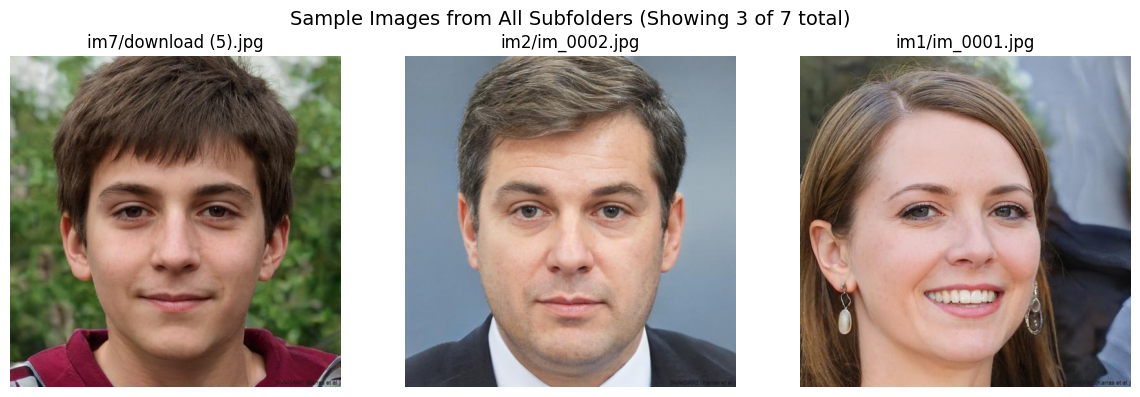

In [5]:
# Display sample images from all subfolders
if os.path.exists(test_images_path):
    display_sample_from_subfolders(test_images_path, num_samples=3)
else:
    print("testImages directory not found - will use examples directory for processing")

### 5. Configure Dataset Generation Parameters

In [6]:
# Create dataset configuration for multi-folder processing
config = DatasetConfig(
    input_folder=input_dir,
    output_folder=output_dir,
    mix_probability=0.8,  # High chance of creating mixed images for demonstration
    ellipse_probability=0.5,  # 50% chance of ellipse masks
    train_split_ratio=0.8,  # 80% for training, 20% for testing
)

print("Dataset Configuration (Multi-Folder Processing Mode):")
print(f"  Input folder: {config.input_folder}")
print(f"  Output folder: {config.output_folder}")
print(f"  Mix probability: {config.mix_probability}")
print(f"  Ellipse probability: {config.ellipse_probability}")
print(f"  Train split ratio: {config.train_split_ratio}")


Dataset Configuration (Multi-Folder Processing Mode):
  Input folder: ./testImages
  Output folder: ./output_face_masks
  Mix probability: 0.8
  Ellipse probability: 0.5
  Train split ratio: 0.8


### 6. Initialize Dataset Generator

In [7]:
try:
    # Initialize the dataset generator
    generator = DatasetGenerator(config)
    print("✓ Dataset generator initialized successfully")
except Exception as e:
    print(f"✗ Failed to initialize dataset generator: {e}")
    import traceback
    traceback.print_exc()

✓ Dataset generator initialized successfully


### 7. Generate the Dataset

In [8]:
try:
    print("Starting dataset generation...")
    print("Processing images from all subfolders in testImages directory...")
    
    # Generate the dataset
    stats = generator.generate_dataset()
    
    print("\n" + "="*50)
    print("GENERATION COMPLETE!")
    print("="*50)
    print(f"Total images processed: {stats['total_images']}")
    print(f"Normal images created: {stats['normal_images']}")
    print(f"Mixed images created: {stats['mixed_images']}")
    print(f"Failed images: {stats['failed_images']}")
    
    # Store stats for later use
    generation_stats = stats
    
except Exception as e:
    print(f"\n✗ Dataset generation failed: {e}")
    import traceback
    traceback.print_exc()

Starting dataset generation...
Processing images from all subfolders in testImages directory...
Found 7 face images
Found 0 background images


Generating dataset: 100%|██████████| 7/7 [00:00<00:00,  9.22it/s]

COCO annotations saved to: ./output_face_masks/annotations/annotations.json
Training annotations saved to: ./output_face_masks/annotations/train.json
Test annotations saved to: ./output_face_masks/annotations/test.json
Train images: 20, Test images: 5

GENERATION COMPLETE!
Total images processed: 25
Normal images created: 1
Mixed images created: 24
Failed images: 0


### 8. View Dataset Stats

In [9]:
try:
    print("Generating dataset report...")
    generator.generate_report()
    
    # Try to load and display the report
    report_path = os.path.join(output_dir, "dataset_report.json")
    if os.path.exists(report_path):
        with open(report_path, 'r') as f:
            report = json.load(f)
        
        print("\n" + "="*40)
        print("DATASET REPORT")
        print("="*40)
        for key, value in report.items():
            if isinstance(value, dict):
                print(f"{key}:")
                for subkey, subvalue in value.items():
                    print(f"  {subkey}: {subvalue}")
            else:
                print(f"{key}: {value}")
    else:
        print(f"Report file not found at: {report_path}")
        
except Exception as e:
    print(f"✗ Report generation failed: {e}")

Generating dataset report...
Dataset report saved to: ./output_face_masks/dataset_report.json

DATASET REPORT
dataset_file: ./output_face_masks/annotations/annotations.json
validation:
  valid: True
  num_images: 25
  num_annotations: 25
  num_categories: 2
  categories: ['normal_image', 'mixed_image']
metrics:
  total_images: 25
  total_annotations: 25
  total_categories: 2
  category_distribution: {'normal_image': 7, 'mixed_image': 18}
  image_dimensions: {'unique_widths': [320], 'unique_heights': [320], 'most_common_size': '320x320'}
generated_at: 2025-09-19T14:15:02.216054


### 9. Visualize Sample Results

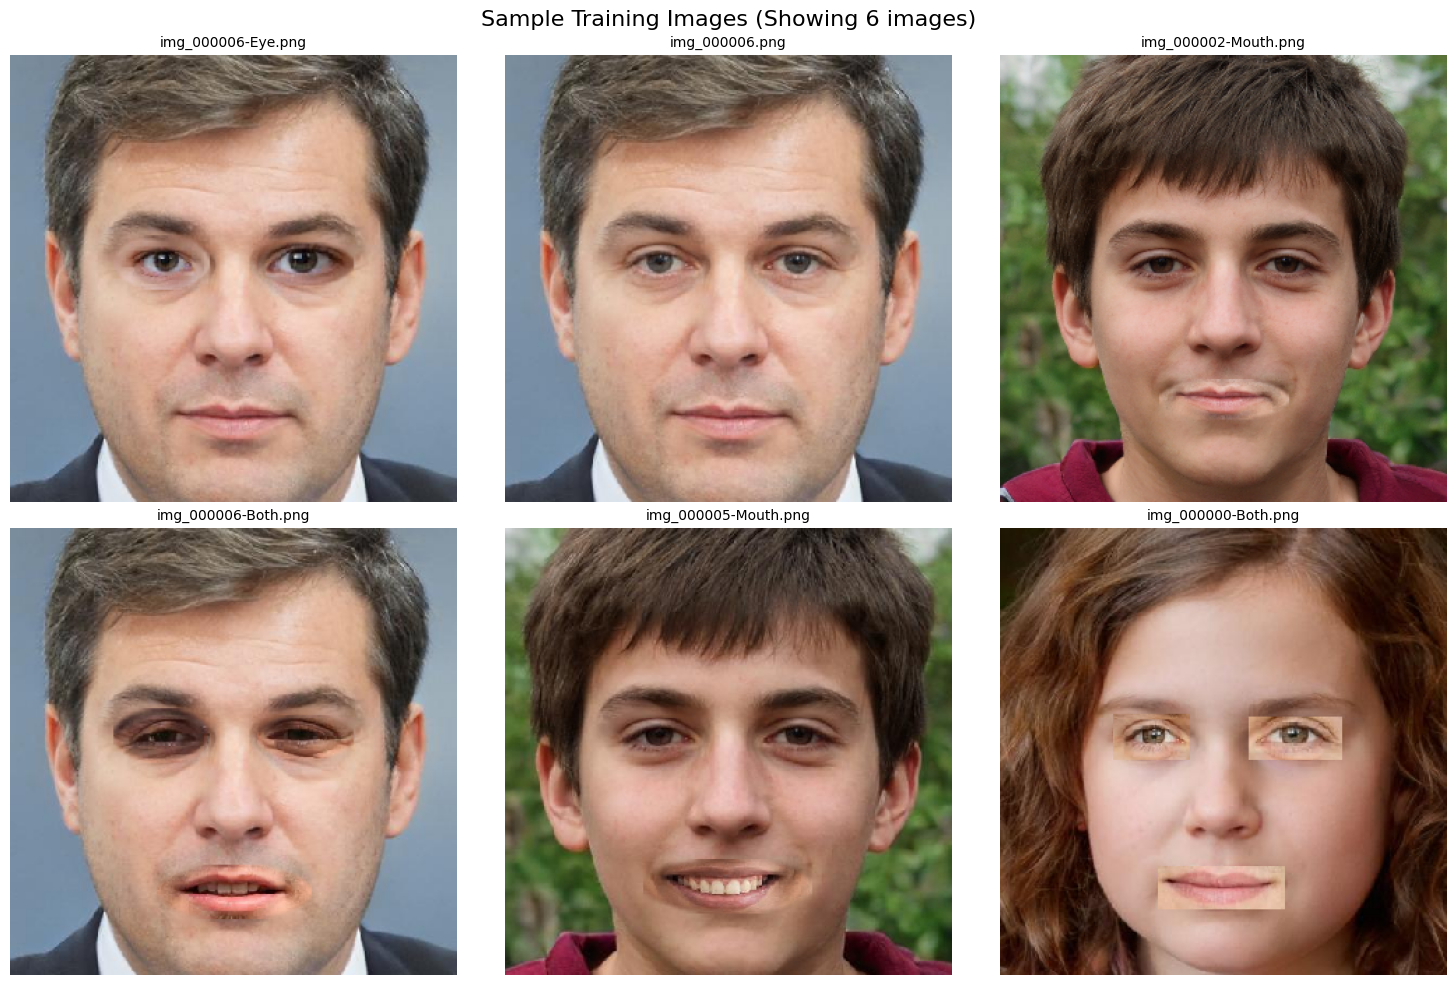

In [10]:
# Display sample training images
train_dir = os.path.join(output_dir, "images")
display_sample_images(train_dir, "Sample Training Images")

### 10. Next Steps and Usage Tips

### What you can do with the generated dataset:

1. **Train Machine Learning Models**: Use the generated images and annotations to train face recognition, detection, or classification models.

2. **Data Augmentation**: Use this as a data augmentation technique to increase your training dataset size.

3. **Research**: Study the effects of mixed facial features on model performance.

### Configuration Tips:

- **mix_probability**: Controls how many mixed images are generated (0.0 = no mixing, 1.0 = all mixed)
- **ellipse_probability**: Controls the shape of mixing masks (0.0 = all rectangles, 1.0 = all ellipses)
- **train_split_ratio**: Controls the train/test split ratio
